In [60]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
from IPython.display import display

df = pd.read_csv("Superstore Sales Dataset.csv")
print(df.info())
display(df.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9800 non-null   int64  
 1   Order ID       9800 non-null   object 
 2   Order Date     9800 non-null   object 
 3   Ship Date      9800 non-null   object 
 4   Ship Mode      9800 non-null   object 
 5   Customer ID    9800 non-null   object 
 6   Customer Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country        9800 non-null   object 
 9   City           9800 non-null   object 
 10  State          9800 non-null   object 
 11  Postal Code    9789 non-null   float64
 12  Region         9800 non-null   object 
 13  Product ID     9800 non-null   object 
 14  Category       9800 non-null   object 
 15  Sub-Category   9800 non-null   object 
 16  Product Name   9800 non-null   object 
 17  Sales          9800 non-null   float64
dtypes: float

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


In [61]:
df.describe()

,Row ID,Postal Code,Sales
count,9800.000000,9789.000000,9800.000000
mean,4900.500000,55273.322403,230.769059
std,2829.160653,32041.223413,626.651875
min,1.000000,1040.000000,0.444000
25%,2450.750000,23223.000000,17.248000
50%,4900.500000,58103.000000,54.490000
75%,7350.250000,90008.000000,210.605000
max,9800.000000,99301.000000,22638.480000


In [62]:

df['Postal Code'] = df['Postal Code'].fillna(0).astype(int)

# Convert 'Postal Code' to integer type
df['Postal Code'] = df['Postal Code'].astype(int)

In [63]:
# Convert text columns to lowercase for uniformity
text_columns = ['Ship Mode', 'Customer Name', 'Segment', 'Country', 'City', 'State', 'Region', 'Category', 'Sub-Category', 'Product Name']
df[text_columns] = df[text_columns].apply(lambda x: x.str.lower())

In [64]:
# Detect outliers in 'Sales' using IQR method
Q1 = df['Sales'].quantile(0.25)
Q3 = df['Sales'].quantile(0.75)
IQR = Q3 - Q1
outlier_threshold_low = Q1 - 1.5 * IQR
outlier_threshold_high = Q3 + 1.5 * IQR

# Add a column indicating outliers
df['Outlier'] = (df['Sales'] < outlier_threshold_low) | (df['Sales'] > outlier_threshold_high)

In [65]:
# col_to_remove = ["Row ID", "Order ID", "Customer ID", "Customer Name", "Postal Code","Product ID"]
# df.drop(columns=col_to_remove, axis=1,inplace=True)

In [66]:
# df['Order Date'] = pd.to_datetime(df['Order Date'], dayfirst=True)
# df['Ship Date'] = pd.to_datetime(df['Ship Date'], dayfirst=True)

In [67]:
# Convert date columns to datetime format
df['Order Date'] = pd.to_datetime(df['Order Date'], format='%d/%m/%Y', errors='coerce')
df['Ship Date'] = pd.to_datetime(df['Ship Date'], format='%d/%m/%Y', errors='coerce')

In [68]:
# Cheka For Null Values  
df.isnull().sum()

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Outlier          0
dtype: int64

In [69]:
# Cheka For duplicated 
print(df.duplicated().sum())

0


In [70]:
# Remove duplicate rows
# df.drop_duplicates(inplace=True)
display(df.describe())

,Row ID,Order Date,Ship Date,Postal Code,Sales
count,9800.000000,9800,9800,9800.000000,9800.000000
mean,4900.500000,2017-05-01 05:13:51.673469440,2017-05-05 04:17:52.653061120,55211.280918,230.769059
min,1.000000,2015-01-03 00:00:00,2015-01-07 00:00:00,0.000000,0.444000
25%,2450.750000,2016-05-24 00:00:00,2016-05-27 18:00:00,23223.000000,17.248000
50%,4900.500000,2017-06-26 00:00:00,2017-06-29 00:00:00,57551.000000,54.490000
75%,7350.250000,2018-05-15 00:00:00,2018-05-19 00:00:00,90008.000000,210.605000
max,9800.000000,2018-12-30 00:00:00,2019-01-05 00:00:00,99301.000000,22638.480000
std,2829.160653,NaN,NaN,32076.677954,626.651875


In [71]:
# Remove any leading/trailing spaces from column names
df.columns = df.columns.str.strip()

In [72]:
obj_cols = df.select_dtypes(include=['object']).columns

for col in obj_cols:
    print(f"Column: {col}")
    print(df[col].value_counts(dropna=False))
    print("-" * 50)
    


Column: Order ID
Order ID
CA-2018-100111    14
CA-2018-157987    12
US-2017-108504    11
CA-2017-165330    11
US-2016-126977    10
                  ..
CA-2018-139619     1
CA-2017-101343     1
CA-2018-120999     1
CA-2018-107727     1
CA-2016-106320     1
Name: count, Length: 4922, dtype: int64
--------------------------------------------------
Column: Ship Mode
Ship Mode
standard class    5859
second class      1902
first class       1501
same day           538
Name: count, dtype: int64
--------------------------------------------------
Column: Customer ID
Customer ID
WB-21850    35
MA-17560    34
PP-18955    34
JL-15835    33
JD-15895    32
            ..
LD-16855     1
JR-15700     1
CJ-11875     1
SC-20845     1
RE-19405     1
Name: count, Length: 793, dtype: int64
--------------------------------------------------
Column: Customer Name
Customer Name
william brown       35
matt abelman        34
paul prost          34
john lee            33
jonathan doherty    32
                 

In [73]:
# dropping unnecessary column
df.drop(["Country","Row ID"], axis=1, inplace=True)

categorical_col = ["Segment", "State", "Region", "Category", "Sub-Category"]
df[categorical_col] = df[categorical_col].astype("category")

In [74]:
df.to_csv("Clean_data.csv")

C:\Users\nmn\AppData\Local\Temp\ipykernel_26140\3394733914.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  region_sales = df.groupby("Region")["Sales"].sum().reset_index()
C:\Users\nmn\AppData\Local\Temp\ipykernel_26140\3394733914.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=region_sales,x="Region" ,y="Sales",palette="magma")


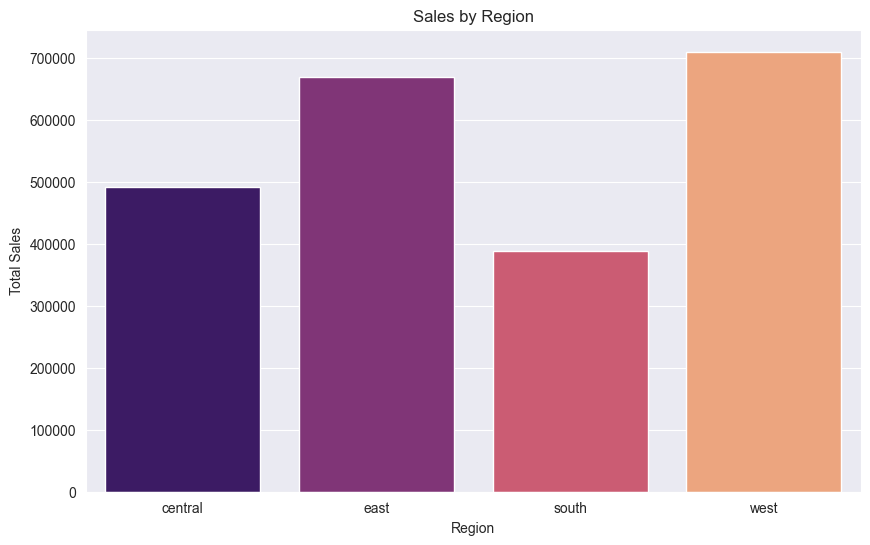

,Region,Sales
3,west,710219.6845
1,east,669518.7260
0,central,492646.9132
2,south,389151.4590


In [75]:
sns.set_style("darkgrid")
region_sales = df.groupby("Region")["Sales"].sum().reset_index()
region_sales = region_sales.sort_values(by="Sales", ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(data=region_sales,x="Region" ,y="Sales",palette="magma")
plt.ylabel("Total Sales")
plt.xlabel("Region")
plt.title("Sales by Region")
plt.show()
region_sales

C:\Users\nmn\AppData\Local\Temp\ipykernel_26140\591651989.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  category_sales = df.groupby("Category")["Sales"].sum().reset_index()
C:\Users\nmn\AppData\Local\Temp\ipykernel_26140\591651989.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=category_sales,x="Category",y="Sales", palette="magma")


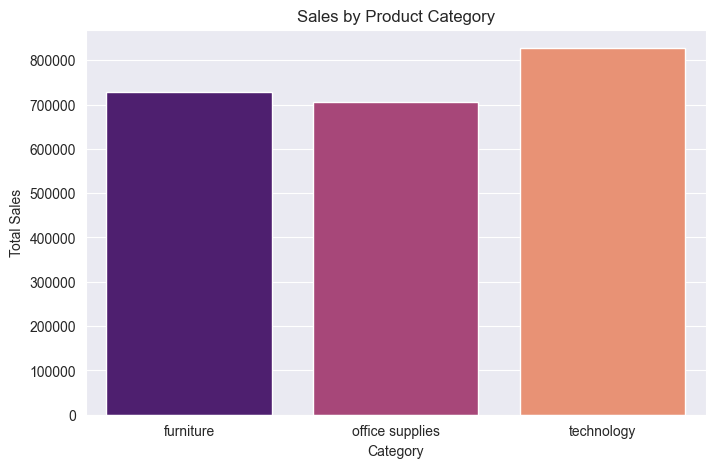

,Category,Sales
2,technology,827455.8730
0,furniture,728658.5757
1,office supplies,705422.3340


In [76]:
category_sales = df.groupby("Category")["Sales"].sum().reset_index()
category_sales = category_sales.sort_values(by="Sales", ascending=False)


plt.figure(figsize=(8, 5))
sns.barplot(data=category_sales,x="Category",y="Sales", palette="magma")
plt.xlabel("Category")
plt.ylabel("Total Sales")
plt.title("Sales by Product Category")
plt.show()
category_sales

C:\Users\nmn\AppData\Local\Temp\ipykernel_26140\3681347104.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  subcat_top_product = df.groupby(["Sub-Category"])["Sales"].sum().reset_index()
C:\Users\nmn\AppData\Local\Temp\ipykernel_26140\3681347104.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=subcat_top_product,x="Sub-Category",y="Sales", palette="magma")


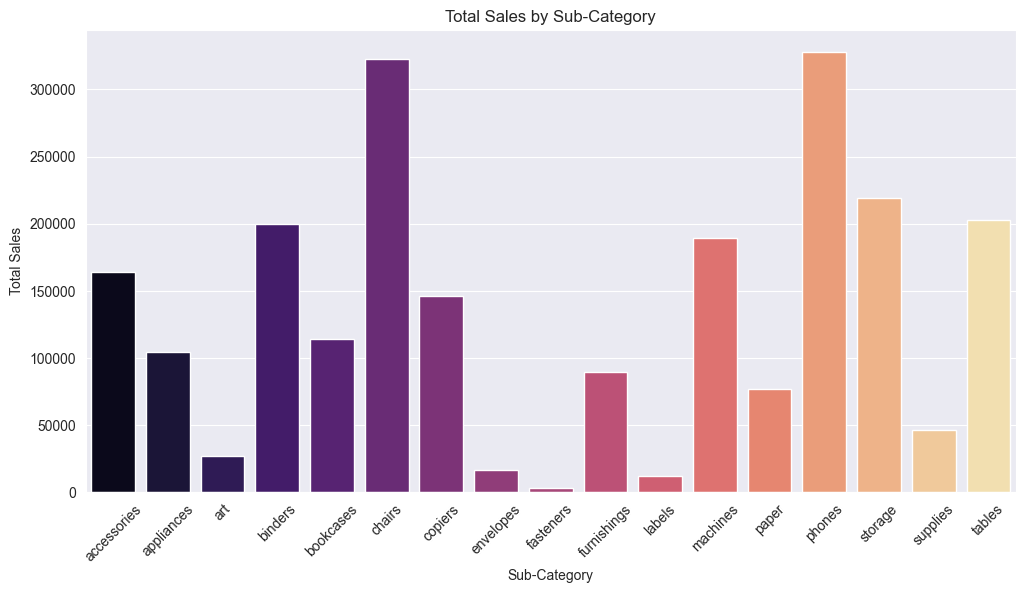

,Sub-Category,Sales
13,phones,327782.4480
5,chairs,322822.7310
14,storage,219343.3920
16,tables,202810.6280
3,binders,200028.7850
11,machines,189238.6310
0,accessories,164186.7000
6,copiers,146248.0940
4,bookcases,113813.1987
1,appliances,104618.4030


In [77]:
subcat_top_product = df.groupby(["Sub-Category"])["Sales"].sum().reset_index()
subcat_top_product = subcat_top_product.sort_values(by="Sales", ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(data=subcat_top_product,x="Sub-Category",y="Sales", palette="magma")
plt.xlabel("Sub-Category")
plt.ylabel("Total Sales")
plt.xticks(rotation=45)
plt.title("Total Sales by Sub-Category")

plt.show()
subcat_top_product

C:\Users\nmn\AppData\Local\Temp\ipykernel_26140\605927503.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_cities,x="City",y="Sales", palette="magma")


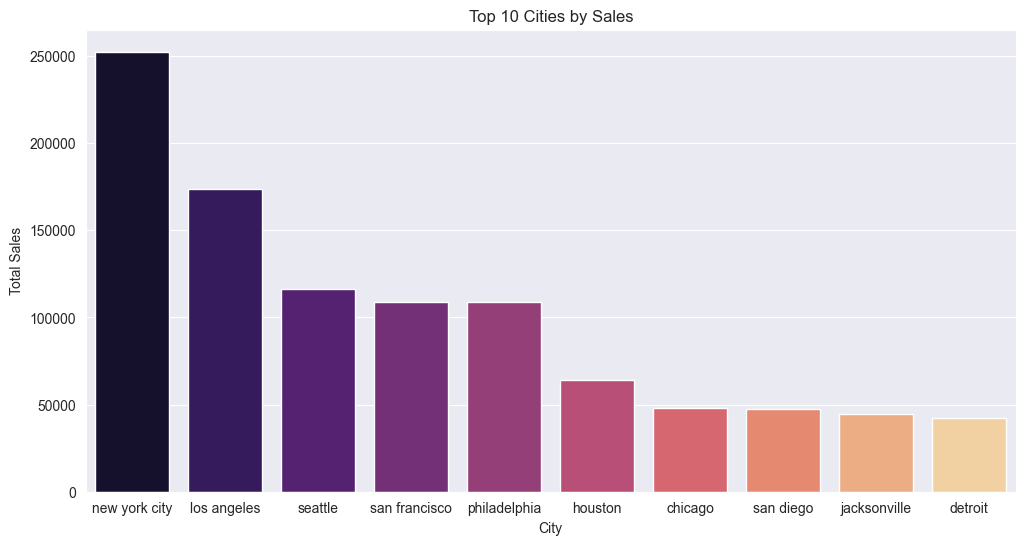

,City,Sales
327,new york city,252462.5470
265,los angeles,173420.1810
450,seattle,116106.3220
436,san francisco,109041.1200
372,philadelphia,108841.7490
207,houston,63956.1428
80,chicago,47820.1330
435,san diego,47521.0290
216,jacksonville,44713.1830
123,detroit,42446.9440


In [78]:
top_cities = df.groupby("City")["Sales"].sum().reset_index()
top_cities = top_cities.sort_values(by="Sales", ascending=False).head(10)


plt.figure(figsize=(12, 6))
sns.barplot(data=top_cities,x="City",y="Sales", palette="magma")
plt.ylabel("Total Sales")
plt.xlabel("City")
plt.title("Top 10 Cities by Sales")
plt.show()
top_cities

C:\Users\nmn\AppData\Local\Temp\ipykernel_26140\34767257.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  orders_per_category = df.groupby("Category")["Order ID"].nunique().reset_index()


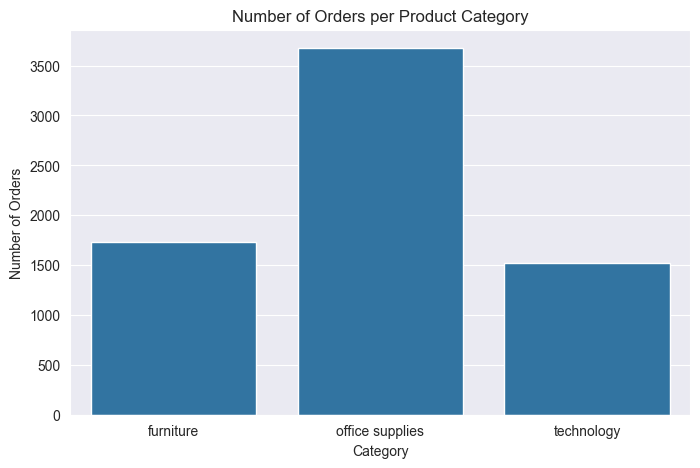

,Category,Order ID
1,office supplies,3676
0,furniture,1727
2,technology,1519


In [79]:
orders_per_category = df.groupby("Category")["Order ID"].nunique().reset_index()
orders_per_category = orders_per_category.sort_values(by="Order ID", ascending=False)

plt.figure(figsize=(8, 5))
sns.barplot(data=orders_per_category, x="Category", y="Order ID")
plt.xlabel("Category")
plt.ylabel("Number of Orders")
plt.title("Number of Orders per Product Category")
plt.show()
orders_per_category

C:\Users\nmn\AppData\Local\Temp\ipykernel_26140\4097909870.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  state_sales = df.groupby("State")["Sales"].sum().reset_index()
C:\Users\nmn\AppData\Local\Temp\ipykernel_26140\4097909870.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=state_sales, x="Sales", y="State", palette="magma")


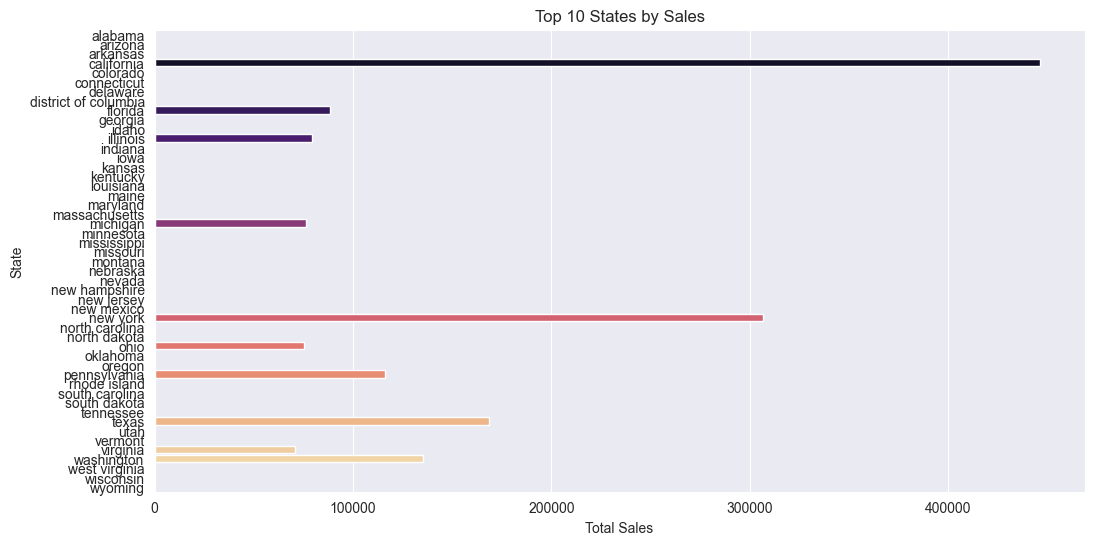

In [91]:
# Aggregate sales by state and get the top 10
state_sales = df.groupby("State")["Sales"].sum().reset_index()
state_sales = state_sales.sort_values(by="Sales", ascending=False).head(10)

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(data=state_sales, x="Sales", y="State", palette="magma")
plt.xlabel("Total Sales")
plt.ylabel("State")
plt.title("Top 10 States by Sales")
plt.show()



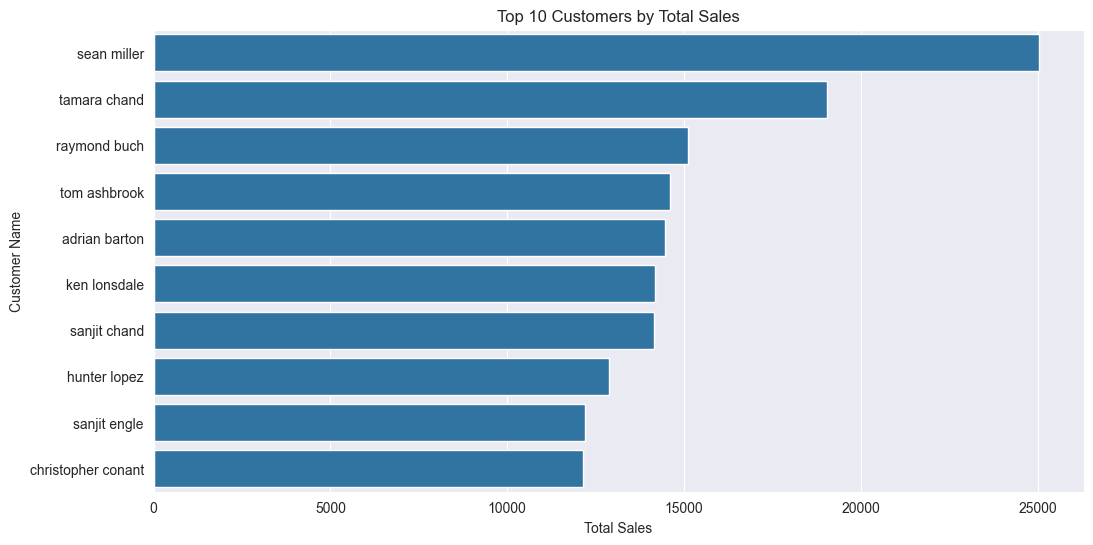

In [81]:
top_customers = df.groupby("Customer Name")["Sales"].sum().reset_index()
top_customers = top_customers.sort_values(by="Sales", ascending=False).head(10)

plt.figure(figsize=(12, 6))
sns.barplot(data=top_customers, x="Sales", y="Customer Name")
plt.xlabel("Total Sales")
plt.ylabel("Customer Name")
plt.title("Top 10 Customers by Total Sales")
plt.show()
